In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

# Linear Algebra for Electrical Engineers


## HW07: Polynomial fitting using least squares method + $k$-fold cross validation

---

- In this homework, you will be aksed to implement a least squares method that fits polynomial functions to the given data points.

- Since this is an integrated method that incorporates several concepts we learned throughout this course (Vandermonde matrix, Gram-Schmidt, QR factorization, and least squares),
we provide the codes for **Gram_Schmidt** and **QR factorization**.

- This HW consists of 4 problems.
    - Problem 1. implementing Vandermonde matrix (0.1 point)
    - Problem 2. (0.6 point)
        - (a) implementing back-substitution (0.3 point)
        - (b) integrating QR factorization with back-substitution (0.3 point)
    - Problem 3. data fitting with least squares (0.2 point)
    - Problem 4. $k$-fold cross validaton (0.1 point)

- please fill out all the 

        # Problem #N. fill out here.

    of given skeleton code.

### NOTE: methods you should NOT use for this assignment:
      np.linalg, scikit-learn()


To begin, we'll use Vandermonde matrix we learned in this course (Section 6.4) to effectively express the polynomial.

## Problem 1. Implementing Vandermonde matrix (0.1 point)


- e.g. if we're to evaluate at $4$ points $-1, 0, 0.5, 1$ for $5$ degree polynomial, the polynomial $y$ can be evalated as matrix-vector multiplication with Vandermonde matrix as

\begin{align}
\begin{bmatrix}
		y_1\\
		y_2\\
		y_3\\
		y_4\\
		\end{bmatrix}=
		\begin{bmatrix}
			1.0 & -1.0 & 1.0 & -1.0 & 1.0 \\
			1.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
			1.0 & 0.5 & 0.25 & 0.125 & 0.0625 \\
			1.0 & 1.0 & 1.0 & 1.0 & 1.0\\
		\end{bmatrix}
		\begin{bmatrix}
		c_1\\
		c_2\\
		c_3\\
		c_4\\
		c_5\\
		\end{bmatrix}
\end{align}

- In problem 1, you're goint to implement a function of Vandermonde matrix, which will be used in forthcoming problems.
- **NOTE**: The Vandermonde function should be 'generic'.
- You can either implement one of the two methods. (you get full grade for just implementing one of the two.)

In [2]:
#NOTE: choose one of the two method to implement vandermonde.

# Method 1) # refer to python lambda function: https://wikidocs.net/64
vandermonde = lambda t, n: np.# TODO: Problem1, fill in here.([t**i for i in range(n)])

# Method 2)
def vandermonde(t, n):
    m = len(t)
    V = np.zeros((m,n))
    for i in # TODO: Problem1, fill in here.:
        for j in # TODO: Problem1, fill in here.:
            V[i,j] = # TODO: Problem1, fill in here.
    return V

SyntaxError: invalid syntax (<ipython-input-2-4094432e5cb0>, line 5)

In [3]:
# test your vandermonde function. 
# check if the result is the same as the sample matrix written above.
vandermonde(np.array([-1,0,0.5,1]),5)


NameError: name 'vandermonde' is not defined

## Problem 2. Least squares method (0.6 point total)

- As we studied in this class (Section 13.1), the polynomial function can be described using Vandermonde matrix. If polynomial equation
of degree at most $p - 1$ with the parameter $\theta$ is

\begin{align}
\hat{f}(x) = \theta_1 + \theta_1 x + \cdots + \theta_p x^{p-1},
\end{align}

- Then Vandermonde matrix can be described as 

\begin{align}
		\begin{bmatrix}
			1.0 & x^{(1)} & \cdots & (x^{(1)})^{p-1} \\
			1.0 & x^{(2)} & \cdots & (x^{(2)})^{p-1}  \\
			\vdots & \vdots &  & \vdots\\
			1.0 & x^(N) & \cdots & (x^{(N)})^{p-1}\\
		\end{bmatrix}.
\end{align}

- We'll use the Vandermonde matrix we implemented in Problem 1 to effectively describe the polynomial.




We will use *Least Squares* method we learned in this course, where 
we use *QR factorization* to compute the approximate of least squares. (please refer to Chapter 12.3).

As written in **Algorithm 12.1** of our textbook (pp.232), the pseudocode for the least squares method is as follows. (see also Algorithm 11.2 of pp.208)


### Least squares via QR factorization

Solving a square system of linear equations $A\mathbf{x} = \mathbf{b}$ where $A$ is invertible yields 

\begin{aligned}
\mathbf{x} = A^{-1}\mathbf{b}=R^{-1}Q^{\top}\mathbf{b}.
\end{aligned}


This can be done in the following three steps.
given an $m \times n$ matrix $A$ with linearly independent columns and $m$-vector $\mathbf{b}$,


1. Compute QR factorization $A=QR$.
2. Compute $Q^{\top}\mathbf{b}$.
3. Solve the triangular equation $R\hat{\mathbf{x}}=Q^{\top}\mathbf{b}$. (back substitution)


---


Here we provide the Gram-Schmidt algorithm and QR-factorization, and you may use these methods to implement the three steps of the pseudocode.


In [4]:
# This implementation is based on Algorithm 5.1 of the textbook. (pp.97)
def gram_schmidt(a):
    """
    in: a - length k list of n-dim np.arrays.
    out: q - length k list of n-dim orthonormal np.arrays. 
    """
    q = []
    # orthogonalization
    for i in range(len(a)): # for i = 1, ..., k
        q_tilde = a[i]
        for j in range(len(q)): # for each dimension of q_tilde
            # recursively add dot(q)
            q_tilde = q_tilde - (np.dot(q[j], a[i]))*q[j]
        # Test for linear dependence
        if np.sqrt(np.sum(q_tilde**2)) <= 1e-10:
            print('Vectors are linearly dependent.')
            print('GS algorithm terminates at iteration ', i+1)
            return q
        #Normalization
        else:
            q_tilde = q_tilde / (np.sqrt(np.sum(q_tilde**2))
            q.append(q_tilde)
    return q


In [5]:
def norm(v):
    return np.sum(v**2)**0.5

# First, check the Gram-Schmidt algorithm works.
# We give gram_schmidt() the length k list of numpy arrays describing n-vectors.
# Let's apply gram_schmidt() on the following three 4-vectors (pp.100).
a = [np.array([-1, 1, -1, 1]), np.array([-1, 3, -1, 3]), np.array([1, 3, 5, 7])]
q = gram_schmidt(a)
# three orthonormal vectors.
print(q)
# check the norm of each vector.
print("Norm of each vector:", norm(q[0]), norm(q[1]), norm(q[2]))
print("Are they orthogonal to each other?")
print("Inner product of q_1 and q_2:", np.dot(q[0], q[1]))
print("Inner product of q_2 and q_3:", np.dot(q[1], q[2]))
print("Inner product of q_3 and q_1:", np.dot(q[2], q[0]))



[array([-0.5,  0.5, -0.5,  0.5]), array([0.5, 0.5, 0.5, 0.5]), array([-0.5, -0.5,  0.5,  0.5])]
Norm of each vector: 1.0 1.0 1.0
Are they orthogonal to each other?
Inner product of q_1 and q_2: 0.0
Inner product of q_2 and q_3: 0.0
Inner product of q_3 and q_1: 0.0


Our gram_schmidt works!
Now we apply this algorithm to do QR factorization.

As written in pp.190 of our textbook, we first define a matrix $A$ whose $n$ column vectors $\mathbf{a}_1, \cdots, \mathbf{a}_k.$ are linearly independent $k$-vectors. Thus $A$ is $n \times k$ matrix.

Also, let matrix $Q$ be $n \times k$ matrix with its columns $\mathbf{q}_1, \cdots, \mathbf{q}_k.$ are orthonormal vectors produced by the Gram-Schmidt algorithm.

Then, the relation btwn $a_i$ and $q_i$ becomes,

\begin{aligned}
a_i = (q^{\top}_1 a_i) + \cdots + (q^{\top}_{i-1} a_i) + \| \tilde{q}_i\|q_i,
\end{aligned}

where $\tilde{q}_i$ is the vector obtained in the first step of the Gram-Schmidt algorithm, as

\begin{aligned}
a_i = R_{1i} q_1 + \cdots + R_{ii} q_i,
\end{aligned}

where $R_{ij} = q^{\top}_i a_j$ for $i < j$ and $R_{ii}=\|\tilde{q}_i\|$.

Defining $R_{ij} = 0$ for $i > j$, we can write the equations above in compact matrix form as 

\begin{aligned}
A = QR.
\end{aligned}



- (different form HW6) the QR decomposition can be implemented as follows.

In [6]:
def QR_factorization(A):
    """
    in: numpy array whose k columns are linearly independent.
    """
    # we feed gram_schmidt() A.T since it orthonormalizes row vectors of the input array. Thus, we get transposed array whose rows are orthonormal. 
    Q_transpose = np.array(gram_schmidt(A.T))
    R = Q_transpose @ A # since Q^T = Q^-1
    Q = Q_transpose.T
    return Q, R

In [15]:
# Let's check if QR_factorization() works.
# first create a matrix whose columns are linearly independent.
A = np.random.normal(size = (6,4)) # (n=6, k=4)

Q, R = QR_factorization(A)

print(R) # we can see that R is upper triangular.

print(np.allclose( Q @ R, A)) # matmul of Q and R yields A.

print(np.allclose(Q.T @ Q, np.eye(4))) # matmul of Q^T Q yields I. 


[[ 3.09218983e+00 -1.96032465e-01  6.86236168e-01 -4.43873169e-02]
 [-4.13778626e-17  1.22454135e+00 -1.98737677e+00 -6.05003089e-01]
 [-1.16227162e-16  1.65484920e-16  2.27959949e+00  2.00998889e-01]
 [-1.72023009e-16 -4.85997071e-17  1.75839960e-16  1.90967429e+00]]
True
True


## Problem 2a) implementing back substitution (0.3 point)

In this sub problem, you will implement *back substitution* that is the last step of solving linear equation. Please refer to Chapter 11.3 (pp.207)

### Back substitution
solve a set of linear equations, $R\mathbf{x} = \mathbf{b}$, where $n \times n$ matrix $R$ is upper triangular matrix with non-zero diagonal entries.


---
given an $n \times n$ upper triangular matrix $R$ with nonzero diagonal entries, and an $n$-vector $\mathbf{b}$,

\begin{aligned}
\text{For}~~i = n, \cdots, 1, \\
x_i = (b_i - R_{i,i+1}x_{i+1} - \cdots - R_{i,n}x_{n})/R_{i,i}
\end{aligned}



In [8]:
def back_substitution(R, b):
    n = R.shape[0]
    x = np.zeros(n)
    # iterate in a reversed order: n, ..., 1.
    for i in # TODO: Problem2, fill in here.:
        x[i] = b[i]
        # recursively subtract R_{i,i+1} x_{i+1}
        for j in # TODO: Problem2, fill in here.:
            x[i] = x[i] - # TODO: Problem2, fill in here.
        # finally divide by R_{i,i}
        x[i] = x[i]/ # TODO: Problem2, fill in here.
    return x

# Let's test our algorithm.
# create 4X4 random upper triangle matrix 
R = np.triu(np.random.random((4, 4)))
b = np.random.random(4)
x = back_substitution(R, b)

# check if we have solved it.
# you get a point if it returns true.
np.allclose(R@x, b)

SyntaxError: invalid syntax (<ipython-input-8-91c4a74bcbf9>, line 5)

Now we have all the ingredients for implementing the least squares method:
-  Vandermonde matrix (problem 1)
- Gram-Schmidt & QR-factorization (given)
- back-substitution (problem 2(a))
---

Then, let's implement the least squares method.


## Problem 2b) integrating QR factorization with back-substitution. (0.3 point)

Here, we implement a function that does 

\begin{aligned}
\mathbf{x} = A^{-1}\mathbf{b}=R^{-1}Q^{\top}\mathbf{b},
\end{aligned}

where

- $A$ is $n \times n$ square matrix that represents $n$ linear equations with $n$ variables, and invertible.
- $\mathbf{b}$ is $n$-vector.

using the given QR_factorization() function and back_subst() we implemented.


In [9]:

def solve_linear_equation(A, b):
    """
    in: A - numpy array that represents invertible square matrix.
        b - numpy array representing n vector.
    """
    # 1) QR factorize A.
    Q, R = # TODO: Problem#2, fill in here.
    # compute Q^T b
    b_tilde = # TODO: Problem#2, fill in here.
    # solve the triangular equation Rx = Q^T b using backsubstitution.
    x = # TODO: Problem#2, fill in here.
    return x

# generate random linear equation.
n = 10
A = np.random.normal(size = (n, n))
b = np.random.normal(size = n)
x = solve_linear_equation(A, b)

# reference solution
x_ref = np.linalg.solve(A, b)

# compare your method with the reference.
# you get a point if it returns true.
np.allclose(x, x_ref)



SyntaxError: invalid syntax (<ipython-input-9-4a0a27f35af4>, line 7)

## Problem 3) data fitting with least squares. (0.2 point)

We investigate the polynomial fitting case (pp.255).

As introduced at the beginning of Problem.2, we'll us the Vandermonde

matrix of the form

\begin{align}
		\begin{bmatrix}
			1.0 & x^{(1)} & \cdots & (x^{(1)})^{p-1} \\
			1.0 & x^{(2)} & \cdots & (x^{(2)})^{p-1}  \\
			\vdots & \vdots &  & \vdots\\
			1.0 & x^{(N)} & \cdots & (x^{(N)})^{p-1}\\
		\end{bmatrix}
\end{align}

to fit a polynomial

\begin{aligned}
\hat{f}(x) = \theta_1 + \theta_2 x + \cdots + \theta_p x^{p-1}.
\end{aligned}

To begin, let's generate random data points.




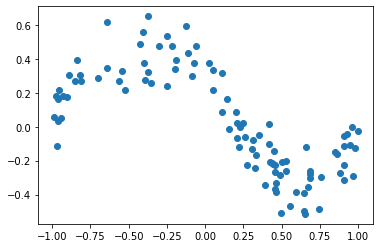

In [10]:
plt.ion()
#Generate training data in the interval [-1,1]
m = 100
x = -1 + 2*np.random.random(m)
y = np.power(x,3) - x + 0.4 / (1 + 25*np.power(x,2)) + 0.10*np.random.normal(size = m)
plt.scatter(x,y)
plt.show()

Now, you should define a polynomial fitting solver that uses vandermonde() function and solve_linear_equation() function.


In [11]:
# TODO: Problem#3, fill in here.
def solve_polynomial_fitting(x, y, degree):
    """
    in: x - numpy array of data points.
        y - numpy array of scalar function values.
        degree - degree of polynomial.
    out: theta tha satisfies A(theta)=y
    """
    # generate the vandermonde matrix
    A = # TODO: Problem#3, fill in here.
    print("shape of vandermonde of degree %d and %d data points:" % (degree, len(x)), A.shape)
    # we have A and b(=y), solve linear equation.
    theta = # TODO: Problem#3, fill in here.
    # return fitted parameters.
    return theta


# check the fitting by plotting
theta3 = solve_polynomial_fitting(x, y, degree=3)
print("shape of 3rd polynomial parameter:", theta3.shape)

theta7 = solve_polynomial_fitting(x, y, degree=7)
print("shape of 7th polynomial parameter:", theta7.shape)

theta11 = solve_polynomial_fitting(x, y, degree=11)
print("shape of 11th polynomial parameter:", theta11.shape)

theta16 = solve_polynomial_fitting(x, y, degree=16)
print("shape of 16th polynomial parameter:", theta16.shape)


SyntaxError: invalid syntax (<ipython-input-11-d8620d55998a>, line 10)

In [12]:
# TODO: Problem#3, fill in here.
def evaluate_polynomial_fitting(x, params):
    # each data point x is multiplied by a set of parameters.
    # generate vadermonde matrix of shape [N, p] (N - # of data points, p -degree of polynomials)
    A = # TODO: Problem#3, fill in here.
    # evaluate the function @ N data points 
    y = # TODO: Problem#3, fill in here.  # [N, p] * [p, ] -> [N,]
    # return the evaluted value.
    return y

# plot 
x_plot = np.linspace(-1, 1, num = m)
fig = plt.figure()
plt.ylim(-1.0, 1.0)

plt.subplot(2, 2, 1)
plt.scatter(x, y)
plt.plot(x_plot, evaluate_polynomial_fitting(x_plot, theta3),'r')
plt.title('3rd polynomial')

plt.subplot(2, 2, 2)
plt.scatter(x, y)
plt.plot(x_plot, evaluate_polynomial_fitting(x_plot, theta7),'r')
plt.title('7th polynomial')

plt.subplot(2, 2, 3)
plt.scatter(x, y)
plt.plot(x_plot, evaluate_polynomial_fitting(x_plot, theta11),'r')
plt.title('11th polynomial')


plt.subplot(2, 2, 4)
plt.scatter(x, y)
plt.plot(x_plot, evaluate_polynomial_fitting(x_plot, theta16),'r')
plt.title('16th polynomial')

plt.tight_layout()
plt.show()


SyntaxError: invalid syntax (<ipython-input-12-e14e2b424f46>, line 5)

## Problem 4) $k$-fold cross validaton (0.1 point)

Cross-validaton measure the generalization ability of a model, to choose a basis function used to construct a model.
The logic is

1. divide the dataset into $k$ folds.
2. fit the model using $1, ..., k-1$ fold.
3. use $k$th fold as the test set.
4. repeat this to do $k$ different evaluations.
5. for each RMS error $\epsilon_1, \cdots, \epsilon_k$, take the final error as $\sqrt{(\epsilon_1^2 + \cdots + \epsilon_k^2)/k}$.

we'll apply this method to our simple $7$th polynomial data.

In [13]:
#TODO: Problem#4, fill in here.
p = 7 # degree of polynomial
K = 3 # number of folds
N = len(x) # number of data points
A = #TODO: Problem#4, fill in here. # 7th polynomial matrix of shape [N, p]
idx_list = np.array_split(np.random.permutation(N), K) # list of data indices for each fold.

rms_train = np.zeros(K) # place holder for train rms error
rms_test = np.zeros(K) # place holder for test rms error
for k in range(K):
    ind_test = idx_list[k] # indices for test data points of kth fold
    # indices for train data points except kth fold. please refer to: https://numpy.org/doc/stable/reference/generated/numpy.delete.html
    ind_train = #TODO: Problem#4, fill in here. 
    theta = #TODO: Problem#4, fill in here.  # compute parameters of 7th polynomial from train set.
    rms_train[k] = (np.sum((A[ind_train] @ #TODO: Problem#4, fill in here. - y[ind_train])**2) / N)**0.5 # compute rms for train set.
    rms_test[k] = (np.sum((A[ind_test] @ #TODO: Problem#4, fill in here. - y[ind_test])**2) / N)**0.5 # compute rms for test set.

rms_data = np.column_stack((np.arange(K, dtype=np.int64), rms_train, rms_test)) # create array for visualization.
fig, ax = plt.subplots()
# Hide axes
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False)

rms_label = ("fold","train_rms", "test_rms")
# draw rms (train/ test) for each fold.
ax.table(cellText=rms_data, colLabels=rms_label, loc='center')



SyntaxError: invalid syntax (<ipython-input-13-11bf93975f04>, line 5)